In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import math as m
import operator

In [3]:
# Read from the csv file
df = pd.read_csv('datasets/shipping.csv')
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [5]:

# Convert Warehouse_block to numerical
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()


df['Warehouse_block_Encoded'] = label_encoder.fit_transform(df['Warehouse_block'])

# Convert Mode_of_Shipment to numerical

df['Mode_of_Shipment_Encoded'] = label_encoder.fit_transform(df['Mode_of_Shipment'])

# Convert Product_importance to numerical
df['Product_importance_Encoded'] = label_encoder.fit_transform(df['Product_importance'])

df['Gender_Encoded'] = label_encoder.fit_transform(df['Gender'])

df.head()


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_Encoded,Mode_of_Shipment_Encoded,Product_importance_Encoded,Gender_Encoded
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,3,0,1,0
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,4,0,1,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1,0,0,1,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1,1,0,2,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1,2,0,2,0


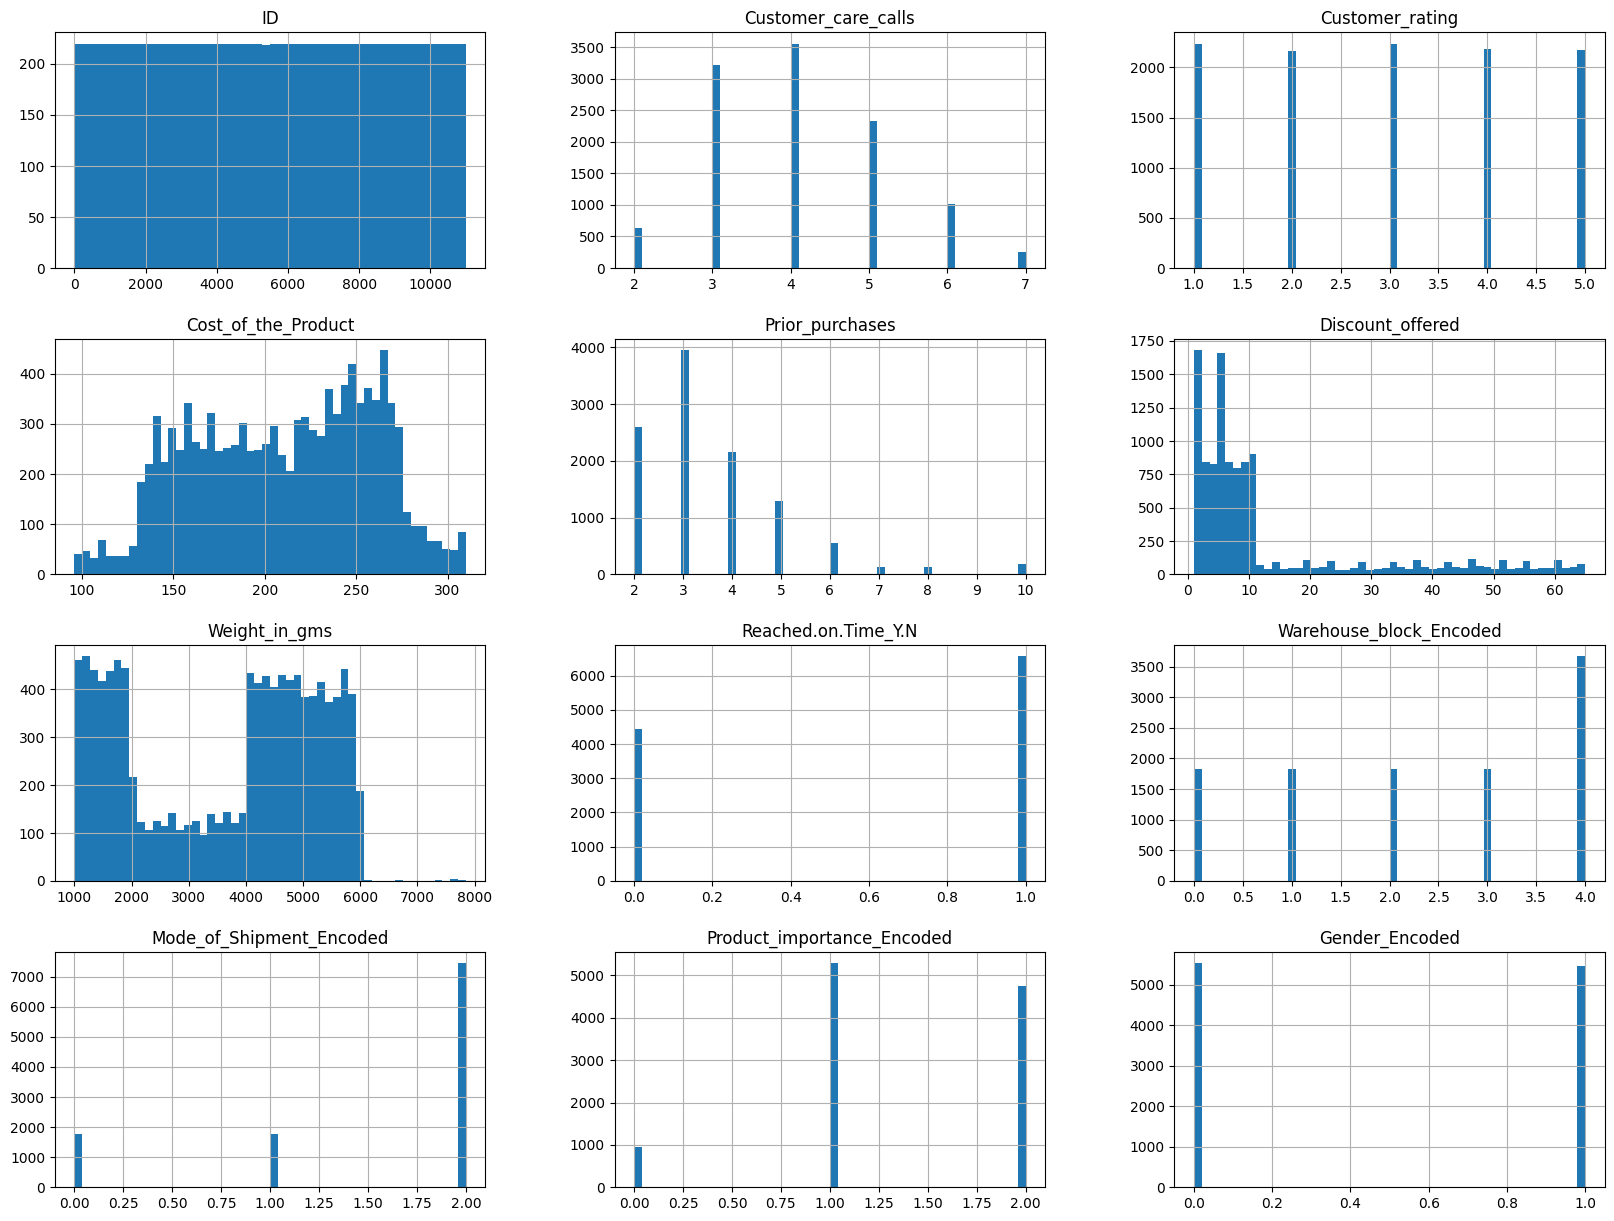

In [6]:
# Visualize the data
import matplotlib.pyplot as plt

df.hist(bins=50, figsize=(20, 15))
plt.show()



In [14]:
X = df.drop(['Reached.on.Time_Y.N', 'Discount_offered', 'Customer_care_calls', 'Customer_rating', 'Weight_in_gms'], axis=1)
print(X)

y = df['Customer_care_calls']

          ID  Cost_of_the_Product  Prior_purchases  Warehouse_block_Encoded  \
0          1                  177                3                        3   
1          2                  216                2                        4   
2          3                  183                4                        0   
3          4                  176                4                        1   
4          5                  184                3                        2   
...      ...                  ...              ...                      ...   
10994  10995                  252                5                        0   
10995  10996                  232                5                        1   
10996  10997                  242                5                        2   
10997  10998                  223                6                        4   
10998  10999                  155                5                        3   

       Mode_of_Shipment_Encoded  Product_importance

In [15]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X = df.drop('Customer_care_calls', axis=1)
y = df['Customer_care_calls']

dtree = DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
# Train the model
dtree.fit(X_train, y_train)

# Predict the values
predictions = dtree.predict(X_test)

# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))


[[ 20  57  68  30   5   0]
 [ 77 350 354 200  34   0]
 [ 61 330 389 237  40   3]
 [ 38 168 257 197  29   5]
 [ 10  32  37  39 133  43]
 [  1   1   2   4  30  19]]
              precision    recall  f1-score   support

           2       0.10      0.11      0.10       180
           3       0.37      0.34      0.36      1015
           4       0.35      0.37      0.36      1060
           5       0.28      0.28      0.28       694
           6       0.49      0.45      0.47       294
           7       0.27      0.33      0.30        57

    accuracy                           0.34      3300
   macro avg       0.31      0.32      0.31      3300
weighted avg       0.34      0.34      0.34      3300



In [17]:
# Plot the decision tree
accuracy = dtree.score(X_test, y_test)
print("Akurasi: ", accuracy)


Akurasi:  0.33575757575757575
